<a href="https://colab.research.google.com/github/ArushiGupta26/blah/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [5]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

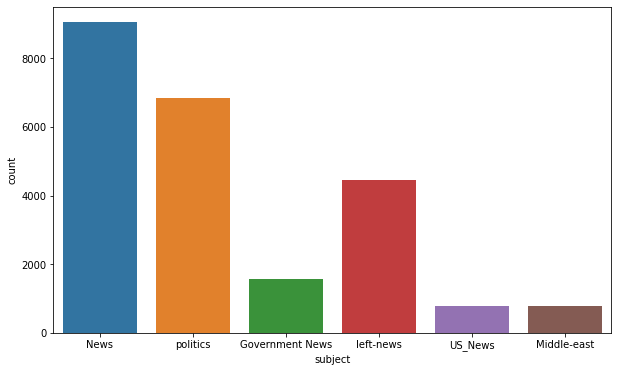

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject',data=fake)

In [10]:
text = ' '.join(fake['text'].tolist())

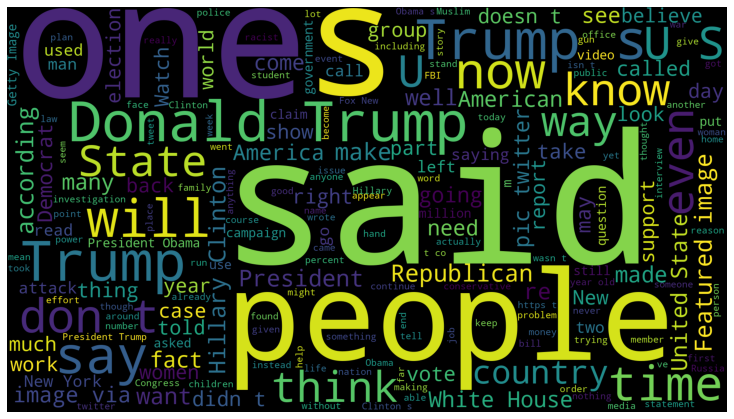

In [11]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Real News

In [12]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [13]:
text = ' '.join(real['text'].tolist())

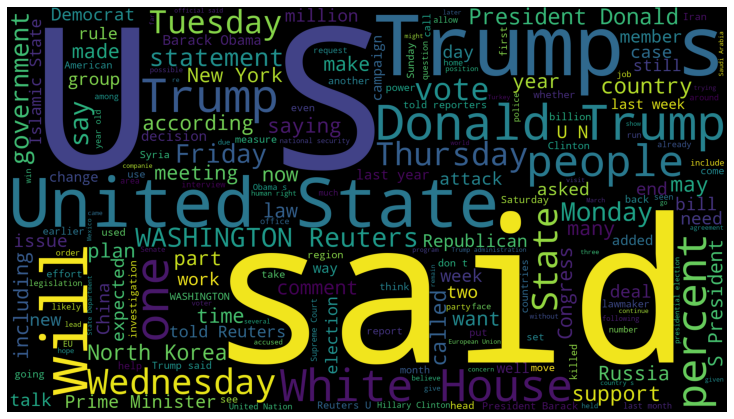

In [14]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
real.sample(5)

,title,text,subject,date
18137,Europe rights watchdog says Turkey's emergency...,BRUSSELS (Reuters) - A leading European rights...,worldnews,"October 6, 2017"
12811,Liberian court clears way for presidential run...,MONROVIA (Reuters) - Liberia s supreme court c...,worldnews,"December 7, 2017"
4705,Virginia court rules for Trump in travel ban d...,(Reuters) - A U.S. federal judge in Virginia r...,politicsNews,"March 24, 2017"
20838,Nigeria's Buhari said he would not seek re-ele...,LAGOS (Reuters) - Nigeria s President Muhammad...,worldnews,"September 6, 2017"
6719,"Exclusive: If Trump skews science, researchers...",WASHINGTON (Reuters) - Scientists must confron...,politicsNews,"December 14, 2016"


In [16]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)  

In [17]:
len(unknown_publishers)

222

In [18]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [19]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [20]:
real = real.drop(8970, axis=0)

In [21]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [22]:
real['publisher']= publisher
real['text'] = tmp_text

In [23]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [24]:
real.shape

(21416, 5)

In [25]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [27]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [28]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

preprocessing text


In [29]:
real['class'] = 1
fake['class'] = 0

In [30]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [31]:
real = real[['text','class']]

In [32]:
fake = fake[['text','class']]

In [33]:
data = real.append(fake, ignore_index=True)

In [34]:
data.sample(5)


,text,class
37441,president promotes made in america: omaha stea...,0
13244,german police say potsdam explosive package no...,1
39855,trump supporters storm maxine waters town hall...,0
40409,liberal snowflake ambushes sean spicer in appl...,0
29945,snyder gets served some very bad news from co...,0


In [35]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 5.1 MB/s 
     |████████████████████████████████| 2.2 MB 74.3 MB/s 
     |████████████████████████████████| 211 kB 73.0 MB/s 
     |████████████████████████████████| 3.7 MB 65.2 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: sp

In [36]:
import preprocess_kgptalkie as ps


In [37]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [38]:
ps.remove_special_chars('this ,.@ is gre@t')

'this is gret'

vectorization-word2vec


In [39]:
import gensim

In [40]:
y = data['class'].values

In [41]:
X = [d.split() for d in data['text'].tolist()]

In [42]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [43]:
len(w2v_model.wv.vocab)

231872

In [44]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7352771162986755),
 ('malaysia', 0.7067208886146545),
 ('china', 0.6804177761077881),
 ('thailand', 0.6421587467193604),
 ('beijings', 0.6259705424308777),
 ('maritime', 0.6082099676132202),
 ('norway', 0.6050753593444824),
 ('indonesia', 0.603103518486023),
 ('chinas', 0.600643515586853),
 ('australia', 0.5971992015838623)]

In [45]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [46]:
X = tokenizer.texts_to_sequences(X)

In [47]:
#tokenizer.word_index

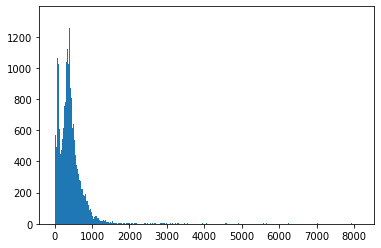

In [48]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [49]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [50]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [51]:
len(X[0])

1000

In [52]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [53]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))
  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix 


In [54]:
embedding_vectors = get_weight_matrix(w2v_model)

In [55]:
embedding_vectors.shape

(231873, 100)

In [56]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length = maxlen, trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [59]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 45s 52ms/step - loss: 0.1476 - acc: 0.9445 - val_loss: 0.0788 - val_acc: 0.9729
Epoch 2/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0548 - acc: 0.9818 - val_loss: 0.0493 - val_acc: 0.9830
Epoch 3/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0531 - acc: 0.9806 - val_loss: 0.0452 - val_acc: 0.9841
Epoch 4/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0264 - acc: 0.9912 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 5/6
737/737 [==============================] - 40s 55ms/step - loss: 0.0147 - acc: 0.9951 - val_loss: 0.0279 - val_acc: 0.9912
Epoch 6/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.0289 - val_acc: 0.9912


In [60]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 7s 19ms/step


In [61]:
accuracy_score(y_test, y_pred)

0.9929621380846325

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5828
           1       0.99      0.99      0.99      5397

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [63]:
x = ['The government is focused towards creating an infrastructure for easy access to medical services for the workers, Labour Minister Bhupender Yadav said on Thursday. Yadav was addressing the Graduation Ceremony of the 4th Batch of ESIC Dental College and Hospital, Rohini, New Delhi, a labour ministry statement ']

In [64]:
x=tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [65]:
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 48ms/step


array([[1]])